# gathergrams - display gather results

In [1]:
%matplotlib inline
import pylab
import numpy
import pandas as pd

In [2]:
sample_id = 'SRR606249'
df = pd.read_csv(f'outputs/{sample_id}.gather.csv')

def fix_name(x):
    return "_".join(x.split('_')[:2]).split('.')[0]

df['name'] = df['name'].apply(fix_name)
df[:4]

,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,md5,f_match_orig,unique_intersect_bp,gather_result_rank,remaining_bp
0,9323000,0.024885,0.977254,0.024885,0.008649,6.831814,6.0,5.847358,GCA_000013645,all-gather-genomes.sbt.zip,ee9cb05018009af43429e83e7d502a0a,0.977254,9323000,0,365320000
1,7288000,0.019453,0.999040,0.019453,0.023517,23.763035,18.0,29.637611,GCA_000009705,all-gather-genomes.sbt.zip,264cfdad44548ad96c4a24b6a514a877,0.999040,7288000,1,358032000
2,7039000,0.018789,0.999858,0.018789,0.089562,93.700242,92.0,27.877040,GCA_000196115,all-gather-genomes.sbt.zip,7141c3fbf206734950d13cadba0bf46c,0.999858,7039000,2,350993000
3,6604000,0.017627,0.999697,0.017627,0.014621,16.304058,16.0,6.636986,GCA_000018565,all-gather-genomes.sbt.zip,5165e0f27ae96c8a78da00c2d30a8e36,0.999697,6604000,3,344389000


# Figure 1: gathergram

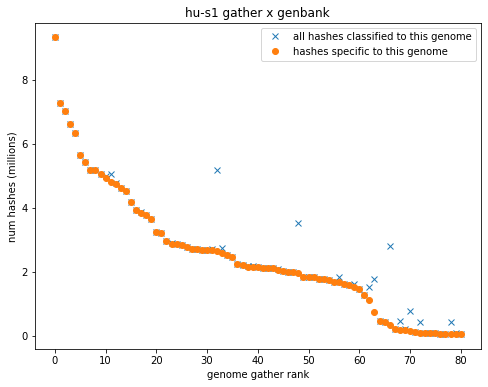

In [3]:
pylab.figure(num=None, figsize=(8, 6))

pylab.plot(df.index, df.intersect_bp / 1e6, 'x', label='all hashes classified to this genome')
pylab.plot(df.index, df.unique_intersect_bp / 1e6, 'o', label='hashes specific to this genome')
#pylab.plot(df.index, df.remaining_bp / 1e6, '-', label='unclassified bp remaining')

pylab.xlabel('genome gather rank')
pylab.ylabel('num hashes (millions)')
pylab.legend(loc='upper right')
pylab.title('hu-s1 gather x genbank')

pylab.savefig(f'/tmp/gathergram-{sample_id}.pdf')